In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [4]:
X.imag

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [5]:
pd.DataFrame(X)[1]

0     -0.577104
1     -2.822995
2     -1.187175
3      1.239061
4     -1.221180
         ...   
995    2.001892
996   -0.458341
997   -1.564918
998    0.877588
999   -0.238079
Name: 1, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

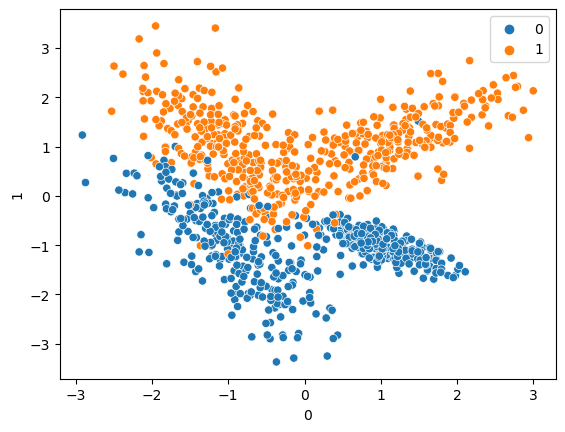

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.25,random_state=10)

In [8]:
from sklearn.svm import SVC

In [9]:
svc=SVC(kernel='linear')

In [10]:
svc.fit(X_test,y_test)

SVC(kernel='linear')

In [11]:
svc.coef_

array([[0.63811672, 2.53772662]])

In [12]:
y_pred=svc.predict(X_train)

In [13]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [15]:
print(confusion_matrix(y_pred,y_train))
print(classification_report(y_pred,y_train))
print(accuracy_score(y_pred,y_train))

[[345  25]
 [ 18 362]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       370
           1       0.94      0.95      0.94       380

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750

0.9426666666666667


In [16]:
 from sklearn.model_selection import GridSearchCV

In [17]:
param = {'C':[0.1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['linear']}

In [25]:

gclf =GridSearchCV(SVC(),param_grid=param,refit=True,cv=5)

In [26]:
gclf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']})

In [27]:
gclf.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [28]:
ypred=gclf.predict(X_test)

In [29]:
print(confusion_matrix(y_pred,y_train))
print(classification_report(y_pred,y_train))
print(accuracy_score(y_pred,y_train))

[[345  25]
 [ 18 362]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       370
           1       0.94      0.95      0.94       380

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750

0.9426666666666667
